# Projectile Motion Assignment: Due 9/21

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

v'x = 0                 
v'y = -9.8                      
x' = vx                      
y' = vy                                  

In [380]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as mp
from scipy import integrate
%matplotlib notebook

In [381]:
#define projectile motion function in vaccum
#def proj_vac
x=0
y=0
v0 = 300
theta0= (5*np.pi)/18
vx = v0* np.cos(theta0)
vy = v0* np.sin(theta0)
ax=0
#m= 13.78373
t0=0
tf=50
n=10
tt = np.linspace(t0,tf,10000)
D=0.15
den = 7800
gam= 0.25
l = 10000
ay= -9.8

p= [x,y,vx,vy]
def proj(t,p):
    ax = 0
    ay = -9.8
    vx = p[2]
    vy = p[3]
    #print(proj)
    return np.array([vx,vy,ax,ay])

def  c(y):
    return gam*(D**2)*np.exp(-y/l)

def drag(t,x):
    return c(y)*((v0)**2)

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [382]:
#code
tspan = (t0,tf)
tf1 = 3.5
tspan1 = (t0,tf1)
t= np.linspace(0.,3.5,10000)
vac = integrate.solve_ivp(proj,tspan,p,method='RK45', t_eval= tt)
vac1 = integrate.solve_ivp(proj,tspan1,p,method='RK45', t_eval= t)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


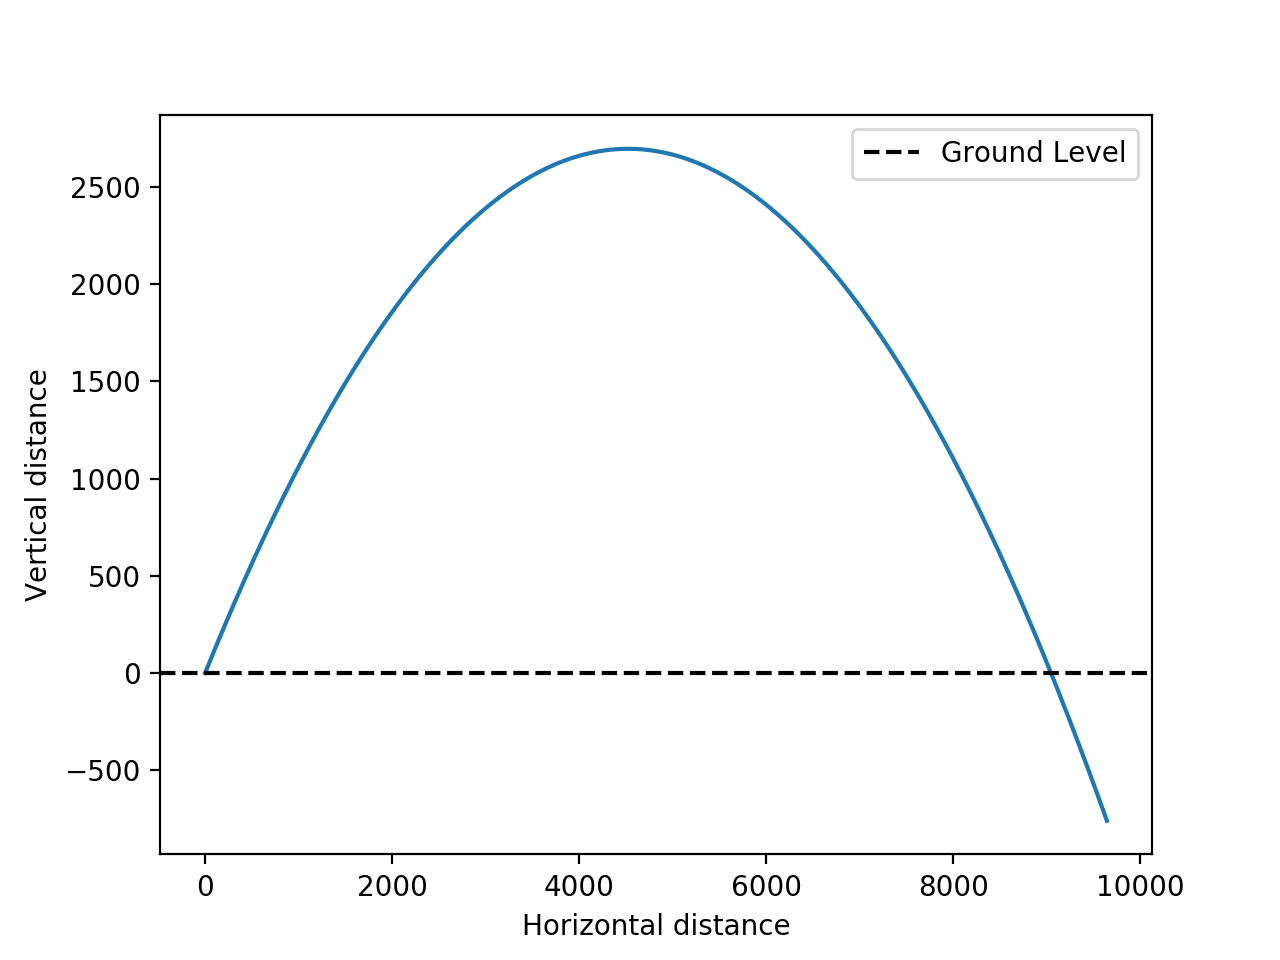

<IPython.core.display.Javascript object>


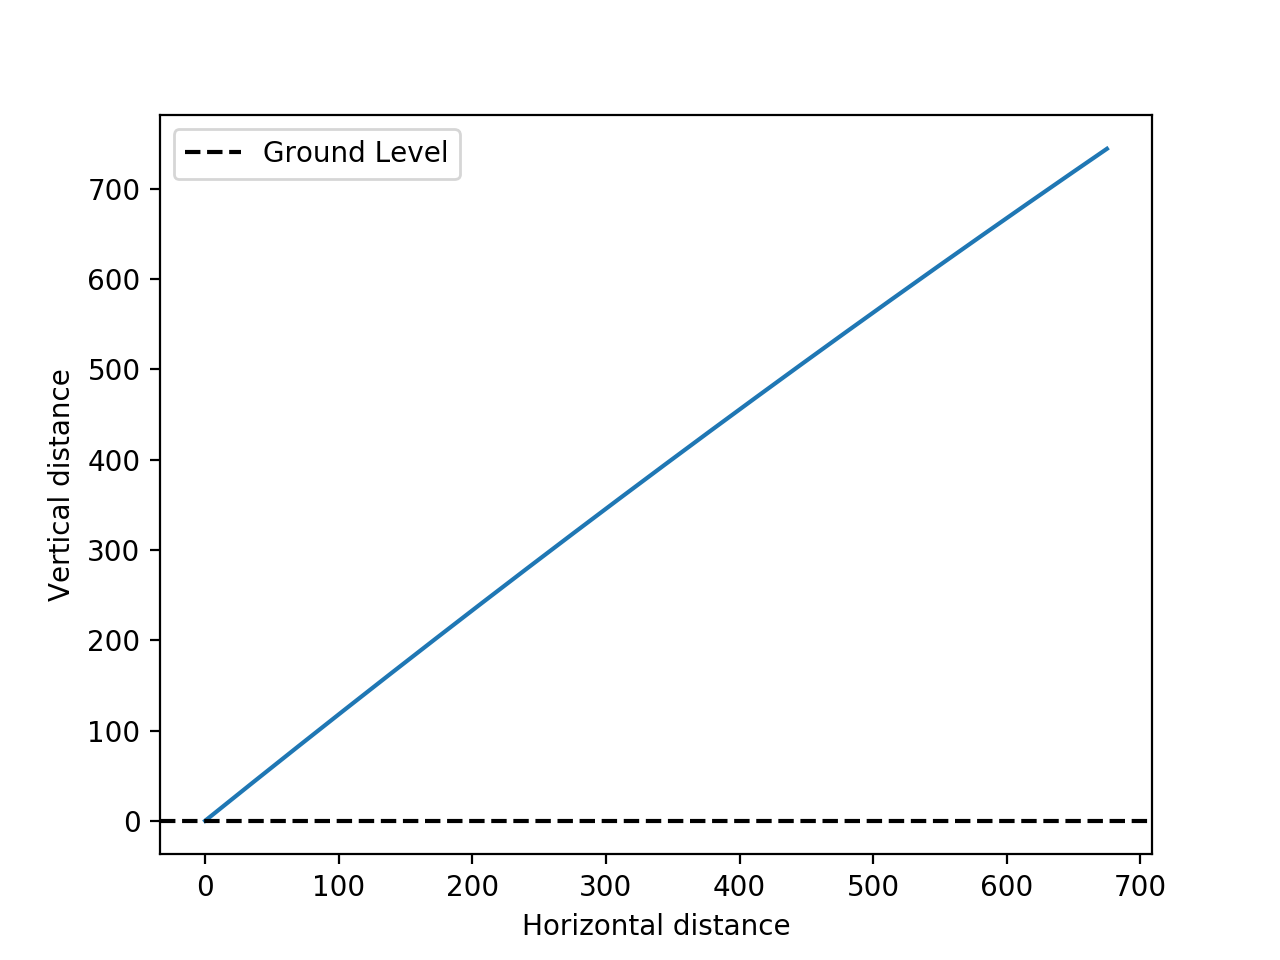

In [383]:
#codes
fig= mp.figure("In vacuum")
mp.plot (vac.y[0],vac.y[1])
mp.ylabel ("Vertical distance")
mp.xlabel ("Horizontal distance")
mp.axhline(y= 0,color='black', linestyle= "--",label = 'Ground Level')
mp.legend();

fig= mp.figure("In vacuum for tf= 3.5s")
mp.plot (vac1.y[0],vac1.y[1])
mp.ylabel ("Vertical distance")
mp.xlabel ("Horizontal distance")
mp.axhline(y= 0,color='black', linestyle= "--",label = 'Ground Level')
mp.legend();


# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [369]:
#codes
def rk(f,t,p):
    n= len(t)
    x0 = p[0]
    x = np.zeros((n,len(p)))
    
    for i in range(0,n-1):
                 dt = t[i+1]-t[i]
                 k1=f(t[i],x[i])
                 k2=f(t[i]+(dt/2),x[i]+((dt/2)*k1))
                 k3=f(t[i]+(dt/2),x[i]+((dt/2)*k2))
                 k4=f(t[i]+dt,x[i]+(dt*k3))
                 x[i+1]=x[i]+((dt/6)*(k1+(2*k2)+(2*k3)+k4))
        
    return x

sol_rk = rk(proj,t,p)
print(x)
print (sol_rk)


0
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.00370068e-07  0.00000000e+00 -3.43034303e-03]
 [ 0.00000000e+00 -2.40148027e-06  0.00000000e+00 -6.86068607e-03]
 ...
 [ 0.00000000e+00 -6.00009900e+01  0.00000000e+00 -3.42931393e+01]
 [ 0.00000000e+00 -6.00129944e+01  0.00000000e+00 -3.42965697e+01]
 [ 0.00000000e+00 -6.00250000e+01  0.00000000e+00 -3.43000000e+01]]


How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

In [370]:
Same/ accurate

NameError: name 'Same' is not defined

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

x' = vx                            
y' = vy                               
ax= -((c/m)*(vx^2+vy^2)^(1/2))vx                        
ay= -mg-((c/m)*(vx^2+vy^2)^(1/2))vy

Code the equations into a function

In [371]:
#code
v = (p[2]**2+p[3]**2)**0.5
def proj_drag(t,p):
    vol = (4/3)*np.pi*((D/2)**3)
    m = den*vol
    #t = np.linspace(0,50,1000000)
    c = gam*D**2
    vx = p[2]
    vy = p[3]
    ax = -(c/m*(vx**2+vy**2)**0.5)*vx
    ay = -9.8- (c/m *(vx**2+vy**2)**0.5)*vy
    

    return np.array([vx,vy,ax,ay])


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [372]:
#codes
drag = integrate.solve_ivp(proj_drag,tspan,p,method='RK45', t_eval= tt)
print(drag)
drag1 = integrate.solve_ivp(proj_drag,tspan1,p,method='RK45', t_eval= t)
print(drag1)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 5.00050005e-03, 1.00010001e-02, ...,
       4.99899990e+01, 4.99949995e+01, 5.00000000e+01])
 t_events: None
        y: array([[ 0.00000000e+00,  9.63982812e-01,  1.92737609e+00, ...,
         3.16640781e+03,  3.16647640e+03,  3.16654497e+03],
       [ 0.00000000e+00,  1.14870748e+00,  2.29646748e+00, ...,
        -2.62792517e+03, -2.62867822e+03, -2.62943127e+03],
       [ 1.92836283e+02,  1.92718309e+02,  1.92600494e+02, ...,
         1.37191896e+01,  1.37149568e+01,  1.37107252e+01],
       [ 2.29813333e+02,  2.29623747e+02,  2.29434381e+02, ...,
        -1.50592617e+02, -1.50595152e+02, -1.50597685e+02]])
 y_events: None
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


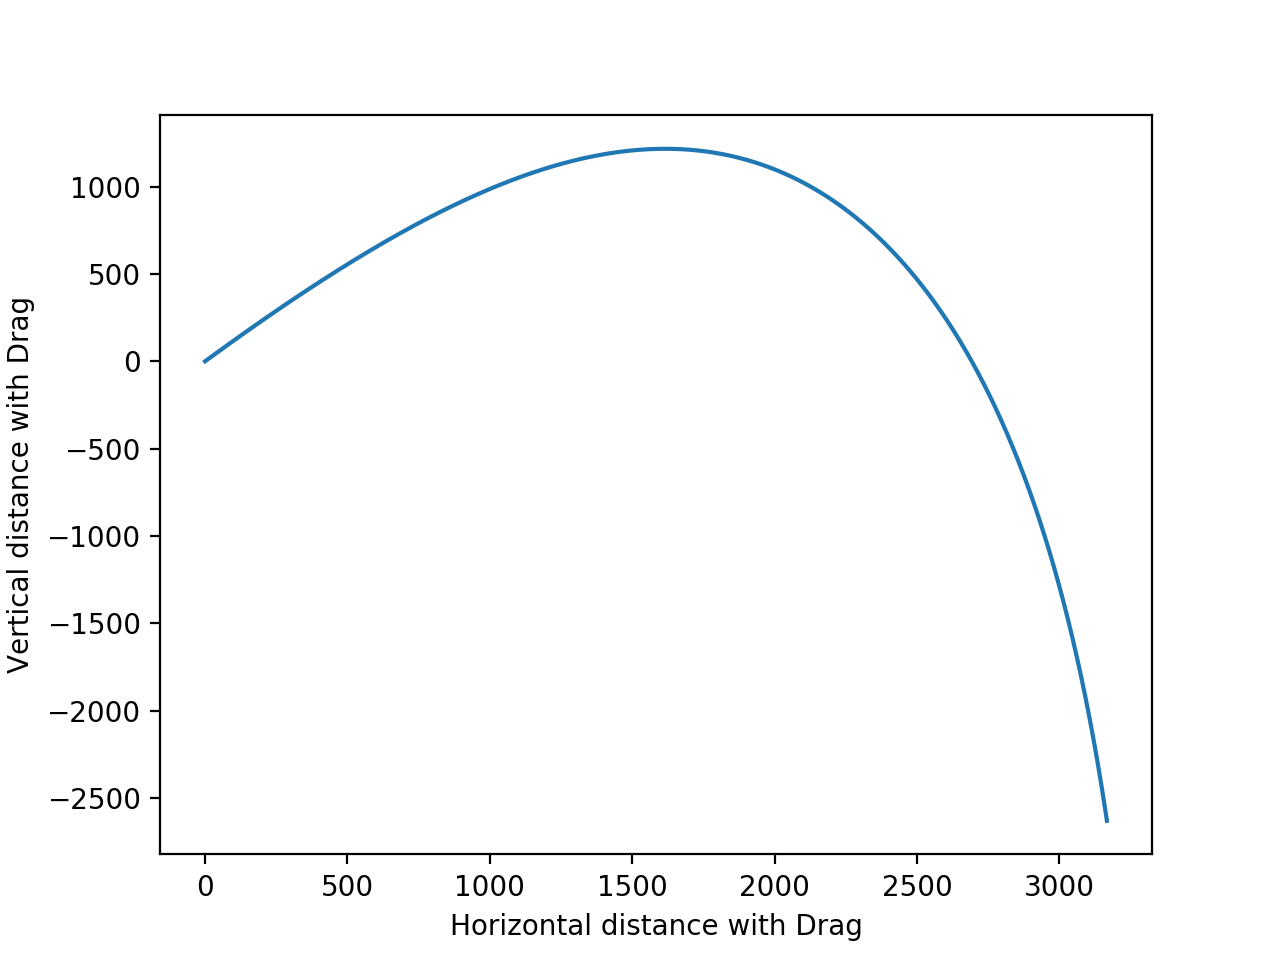

<IPython.core.display.Javascript object>


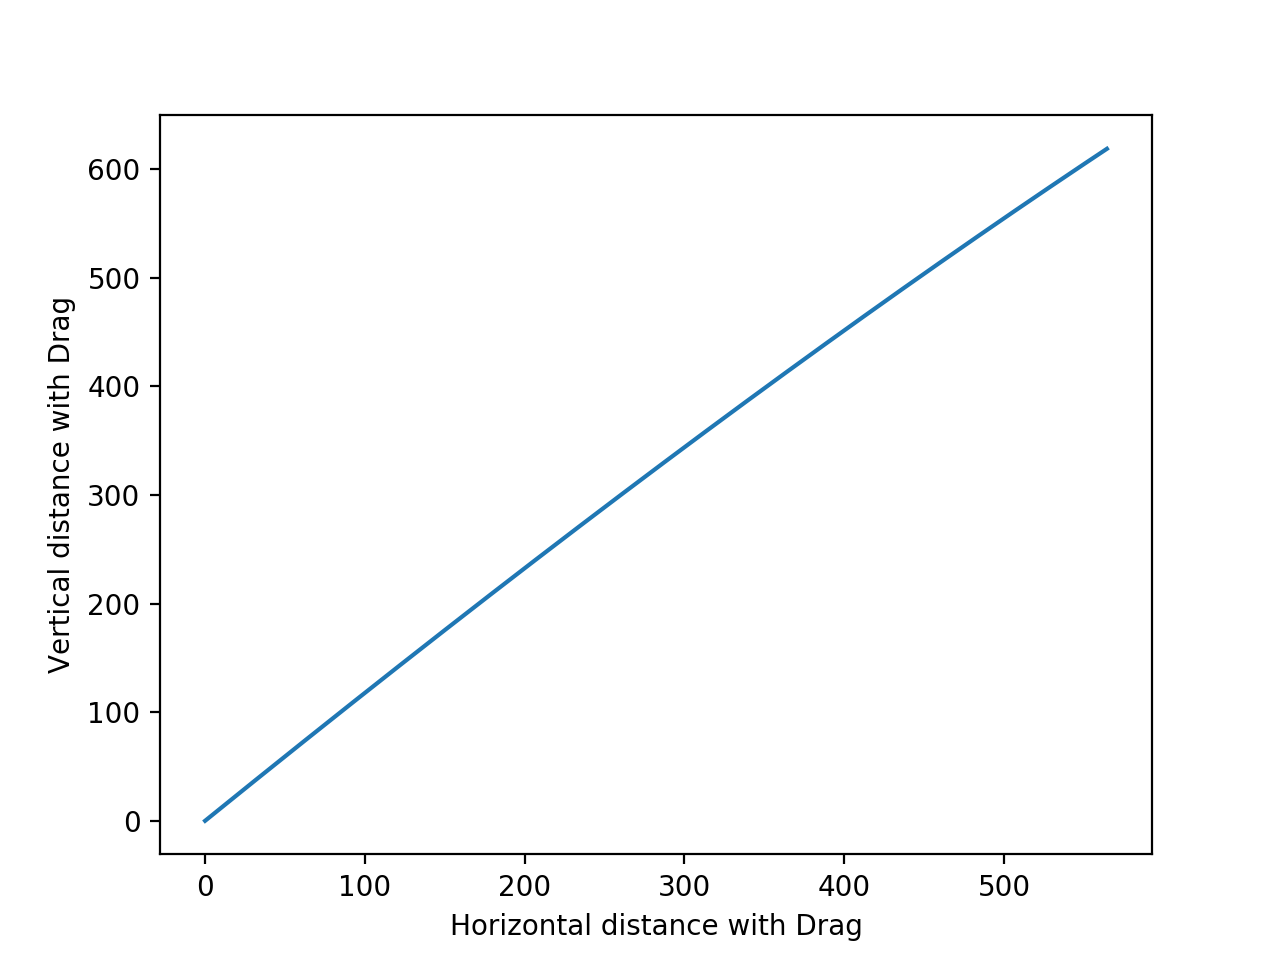

In [373]:
#codes
fig= mp.figure("With Drag")
mp.plot (drag.y[0],drag.y[1])
mp.ylabel ("Vertical distance with Drag")
mp.xlabel ("Horizontal distance with Drag")
mp.axhline(y= 0,color='black', linestyle= "--",label = 'Ground Level')
mp.legend()

fig= mp.figure("With Drag at tf = 3.5s")
mp.plot (drag1.y[0],drag1.y[1])
mp.ylabel ("Vertical distance with Drag")
mp.xlabel ("Horizontal distance with Drag")
mp.axhline(y= 0,color='black', linestyle= "--",label = 'Ground Level')
mp.legend();

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

x' = vx                        
y' = vy                                
ax= -((c/m)*(vx^2+vy^2)^(1/2))vx                                    
ay= -mg-((c/m)*(vx^2+vy^2)^(1/2))vy                                  

In [374]:
#code
cn = gam*(D**2)*np.exp(-y/l)
vol = (4/3)*np.pi*((D/2)**3)
m = den*vol
t1 = np.linspace(0,3.5,1000000)
def proj_dragatm(t1,p):
    cn = gam*(D**2)*np.exp(-y/l)
    vx = p[2]
    vy = p[3]
    ax = -(cn/m*(vx**2+vy**2)**0.5)*vx
    ay = -9.8-(((cn/m)*((vx**2+vy**2)**0.5))*vy)
    

    return np.array([vx,vy,ax,ay])


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [375]:
#codes

dragatm = integrate.solve_ivp(proj_dragatm,tspan,p,method='RK45', t_eval= tt)
print(dragatm)
dragatm1 = integrate.solve_ivp(proj_dragatm,tspan1,p,method='RK45', t_eval= t)
print(dragatm)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 5.00050005e-03, 1.00010001e-02, ...,
       4.99899990e+01, 4.99949995e+01, 5.00000000e+01])
 t_events: None
        y: array([[ 0.00000000e+00,  9.63982812e-01,  1.92737609e+00, ...,
         3.16640781e+03,  3.16647640e+03,  3.16654497e+03],
       [ 0.00000000e+00,  1.14870748e+00,  2.29646748e+00, ...,
        -2.62792517e+03, -2.62867822e+03, -2.62943127e+03],
       [ 1.92836283e+02,  1.92718309e+02,  1.92600494e+02, ...,
         1.37191896e+01,  1.37149568e+01,  1.37107252e+01],
       [ 2.29813333e+02,  2.29623747e+02,  2.29434381e+02, ...,
        -1.50592617e+02, -1.50595152e+02, -1.50597685e+02]])
 y_events: None
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


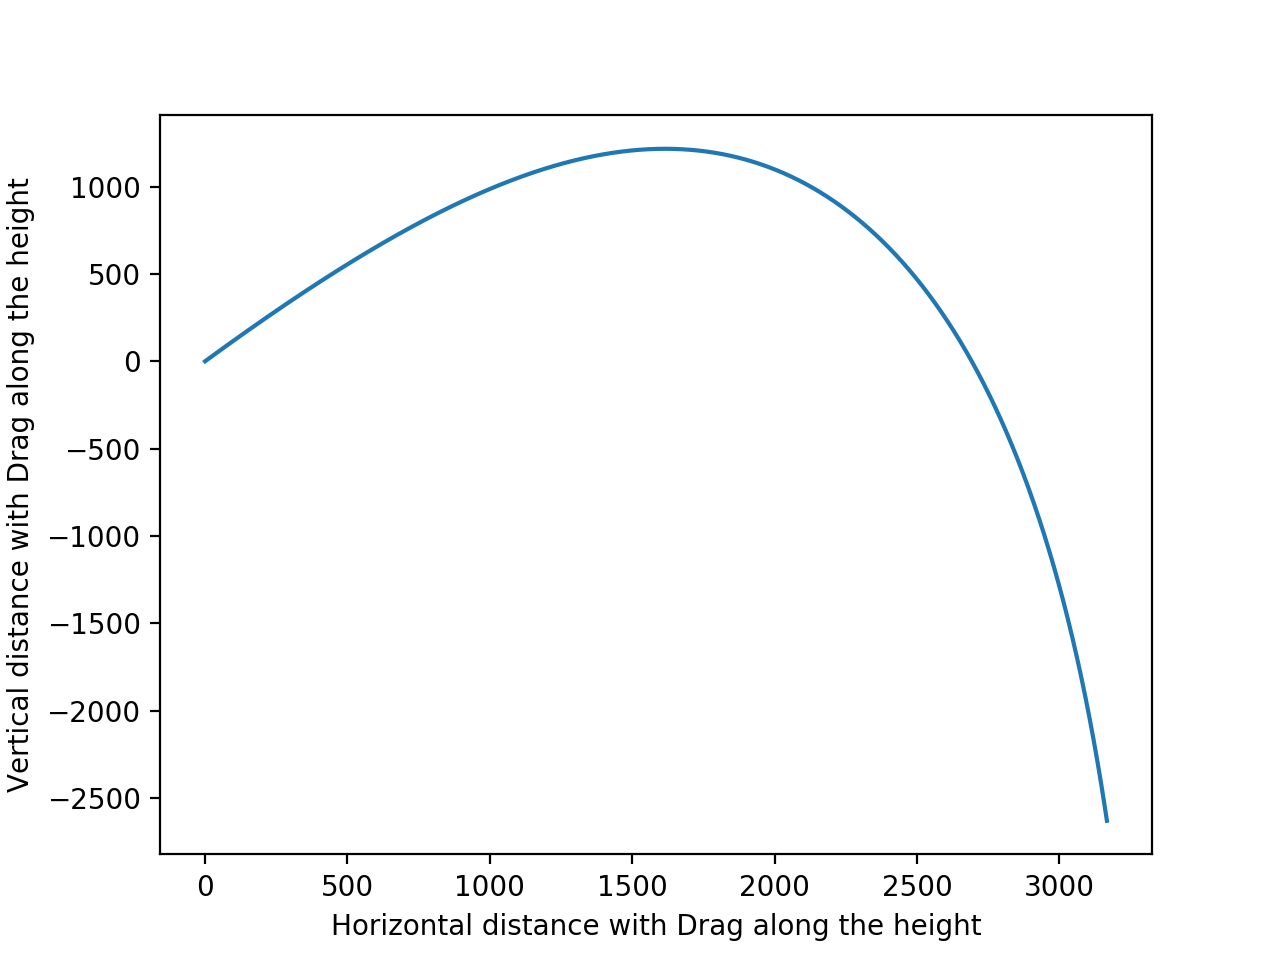

<IPython.core.display.Javascript object>


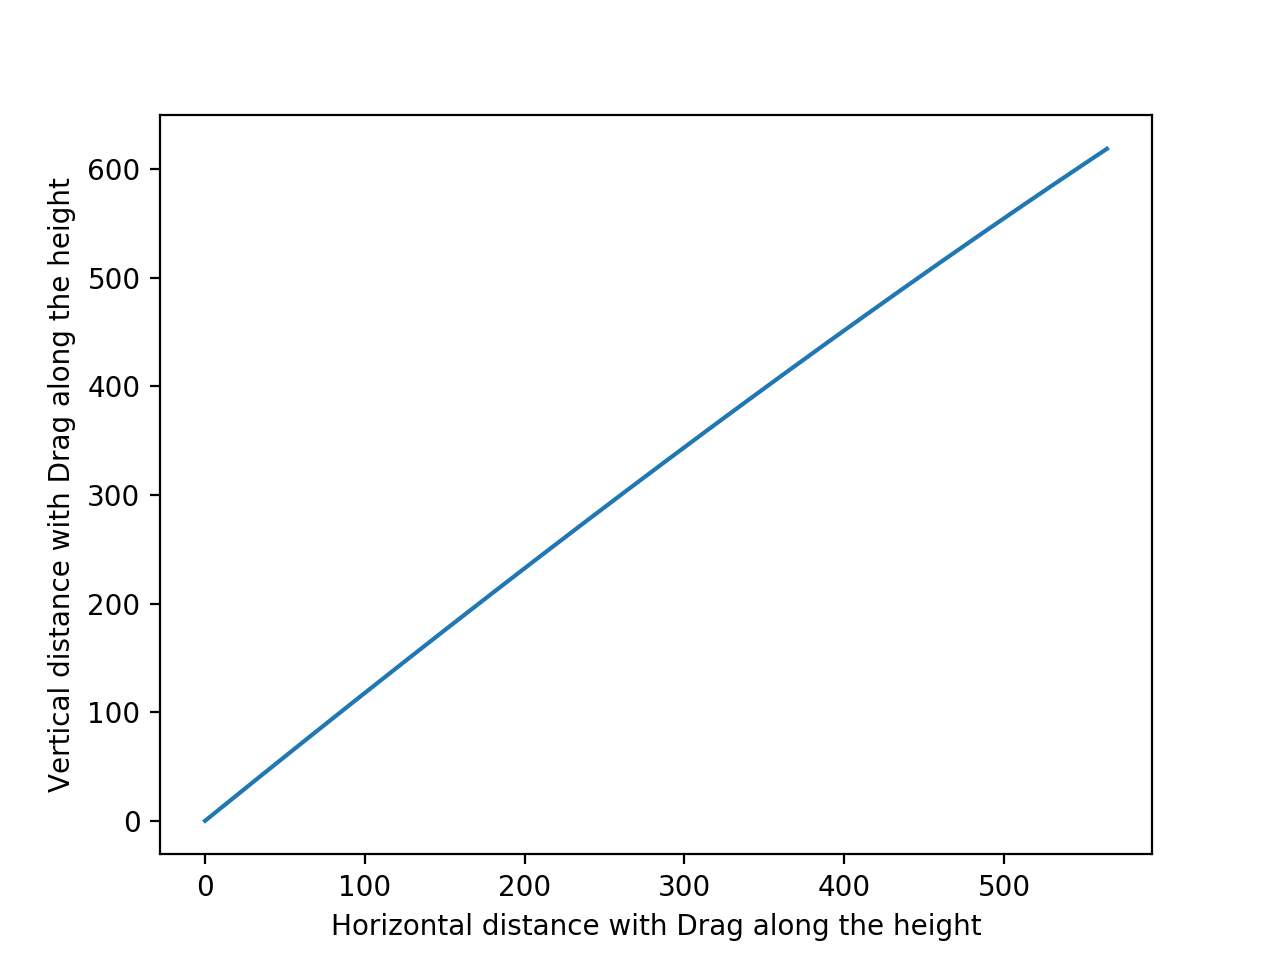

In [376]:
#codes
fig= mp.figure("With Drag along height")
mp.plot (dragatm.y[0],dragatm.y[1])
mp.ylabel ("Vertical distance with Drag along the height")
mp.xlabel ("Horizontal distance with Drag along the height")
mp.axhline(y= 0,color='black', linestyle= "--",label = 'Ground Level')
mp.legend()

fig= mp.figure("With Drag along height at tf = 3.5s")
mp.plot (dragatm1.y[0],dragatm1.y[1])
mp.ylabel ("Vertical distance with Drag along the height")
mp.xlabel ("Horizontal distance with Drag along the height")
mp.axhline(y= 0,color='black', linestyle= "--",label = 'Ground Level')
mp.legend();

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


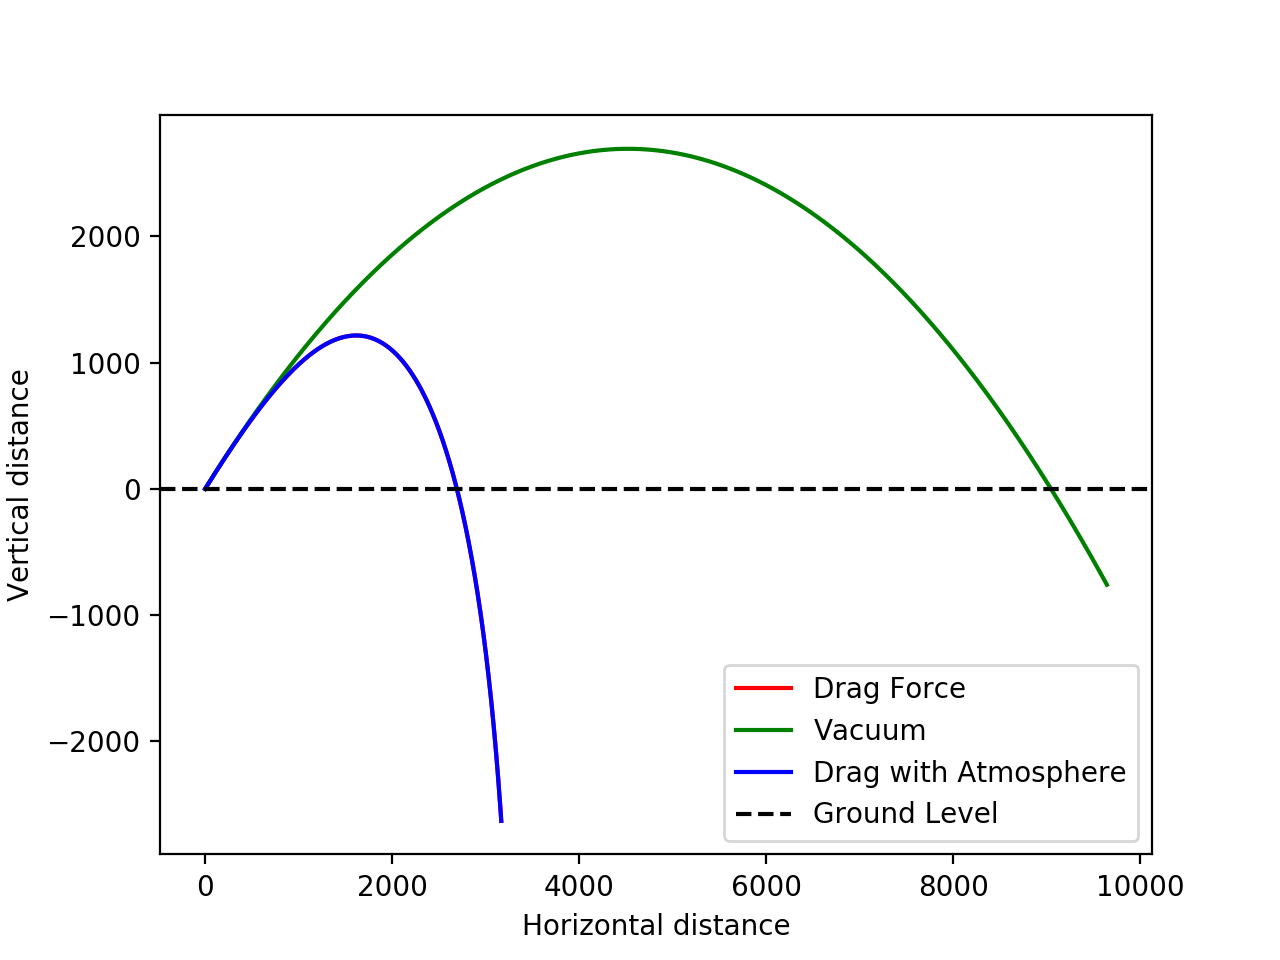

In [377]:
#codes
fig= mp.figure("All conditions")
mp.plot (drag.y[0],drag.y[1],'r',label = 'Drag Force')
mp.plot (vac.y[0],vac.y[1],'g', label='Vacuum')
mp.plot (dragatm.y[0],dragatm.y[1],'b',label='Drag with Atmosphere')
mp.ylabel ("Vertical distance")
mp.xlabel ("Horizontal distance")
mp.axhline(y= 0,color='black', linestyle= "--",label = 'Ground Level')
mp.legend();

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

In [378]:
Both of them nearly have the same graph

SyntaxError: invalid syntax (<ipython-input-378-42f4a18a91a9>, line 1)